# Linear Regression from Scratch

In [1]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
dataset = load_boston()

In [3]:
X = dataset.data
y = dataset.target[:,np.newaxis] 
#[:,np.newaxis] increase the dimension of the existing array by one more dimension

In [4]:
print("Total samples in out dataset is: {}".format(X.shape[0]))

Total samples in out dataset is: 506


In [5]:
def hypothesis(X, params):
    return X @ params #@ = np.matmul matrix multiplication
    

In [6]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = hypothesis(X, params) 
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [7]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J = np.zeros((n_iters,1))
    
    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (hypothesis(X, params) - y)
        J[i] = compute_cost(X, y, params)
    
    return J, params

Before we run the gradient descent algorithm on our dataset, we **normalize** the data. 

Normalization is a technique often applied as part of data preparation in machine learning pipeline which typically means rescaling the values into a range of [0,1] to boost our accuracy while lowering the cost (error). 

We use ```hstack``` to add a column of ones before the normalised X matrix, this is so that we can evaluate the bias parameter during gradient descent.

Also, note that we initialize the paramaters (params) to zeros.

In [8]:
n_samples = len(y)

mu = np.mean(X,0)
sigma = np.std(X,0)

X = (X-mu)/sigma

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1) #no. of columns
params = np.zeros((n_features,1)) #make it a col of len n_features

In [9]:
dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
(dataset.data-mu)/sigma

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [11]:
np.ones((n_samples,1)).shape

(506, 1)

In [12]:
np.hstack((np.ones((n_samples,1)),(dataset.data-mu)/sigma))

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [13]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is {}".format(initial_cost))

Initial cost is 296.0734584980237


In [14]:
J, optimal_params = gradient_descent(X,y, params, learning_rate, n_iters)

In [15]:
print("Optimal parameters are: \n{}".format(optimal_params))

Optimal parameters are: 
[[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]]


In [16]:
print("Final cost is: {}".format(J[-1]))

Final cost is: [11.00713381]


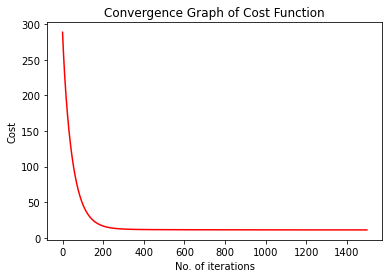

In [17]:
plt.plot(range(len(J)), J, 'r')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Convergence Graph of Cost Function')
plt.show()

In [18]:
y_pred = hypothesis(X, optimal_params)

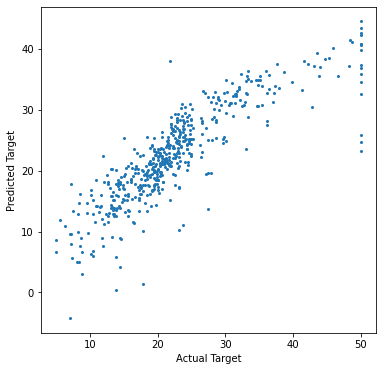

In [19]:
plt.figure(figsize=(6,6))
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.plot(y, y_pred, 'o', markersize='2')

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
rmse = (mean_squared_error(y, y_pred))**0.5

In [22]:
print("RMSE:{}".format(rmse))

RMSE:4.691936447238599


## Using the Linear Regression class

In [23]:
import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [24]:
dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

our_regressor = lr.LinearRegression(X_train, y_train).fit()
sklearn_regressor = LinearRegression().fit(X_train, y_train)

our_train_accuracy = our_regressor.score()
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

our_test_accuracy = our_regressor.score(X_test, y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

pd.DataFrame([[our_train_accuracy, sklearn_train_accuracy],
              [our_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

,Our Implementation,Sklearn's Implementation
Training Accuracy,0.743482,0.743500
Test Accuracy,0.675347,0.711226


In [25]:
our_y_pred = our_regressor.predict(X_test)
sklearn_y_pred = sklearn_regressor.predict(X_test)

In [26]:
m_our, b_our = np. polyfit(y_test, our_y_pred, 1) #m = slope, b = intercept.
m_sklearn, b_sklearn = np. polyfit(y_test, sklearn_y_pred, 1)

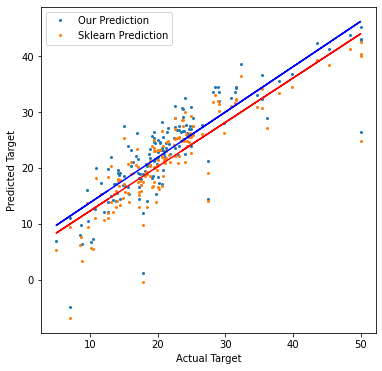

In [27]:
plt.figure(figsize=(6,6))
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.plot(y_test, our_y_pred, 'o', markersize='2', label = 'Our Prediction')
plt.plot(y_test, sklearn_y_pred, 'o', markersize='2', label = 'Sklearn Prediction')
plt.plot(y_test, m_our*y_test + b_our, 'b')
plt.plot(y_test, m_sklearn*y_test + b_sklearn, 'r')
plt.legend()
plt.show()

In [28]:
m_our 

array([0.81102237])

In [29]:
m_sklearn

0.7923565576893872